In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("KS_train_data.csv", delimiter=',') 
test = pd.read_csv("KS_test_data.csv", delimiter=';')

In [3]:
data['funded'].value_counts()

True     58454
False    41546
Name: funded, dtype: int64

<AxesSubplot:>

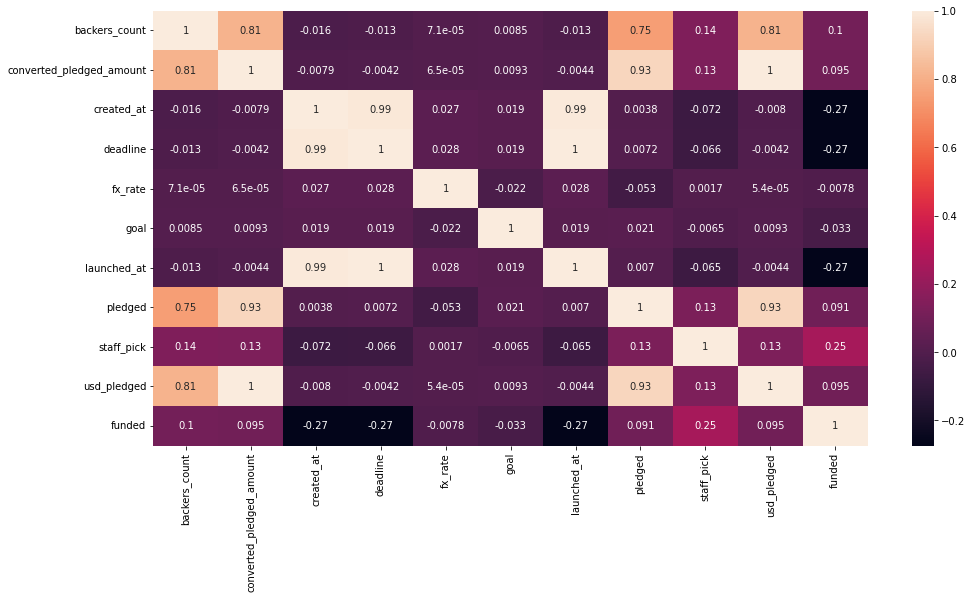

In [4]:
corrmat = data.corr()

sns.heatmap(corrmat, annot=True)

In [20]:
data['Prob_score'] = ""

index = 0
for row in data.category:
    if index == 0:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)]) 
    elif row != category:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)])
    data['Prob_score'][index] = true_values / total_values
    index += 1

In [21]:
data['rem_time'] = data['deadline'] - data['launched_at']

In [22]:
#here 2 possible outliers can be seen at the top
# data.nlargest(15,['converted_pledged_amount'] )
# pd.reset_option('display.max_rows')
# data.category.value_counts()
data['Prob_score'].head(10000)

0       0.558767
1       0.558767
2       0.558767
3       0.558767
4       0.558767
          ...   
9995    0.760194
9996    0.760194
9997    0.760194
9998    0.760194
9999    0.760194
Name: Prob_score, Length: 10000, dtype: object

<AxesSubplot:>

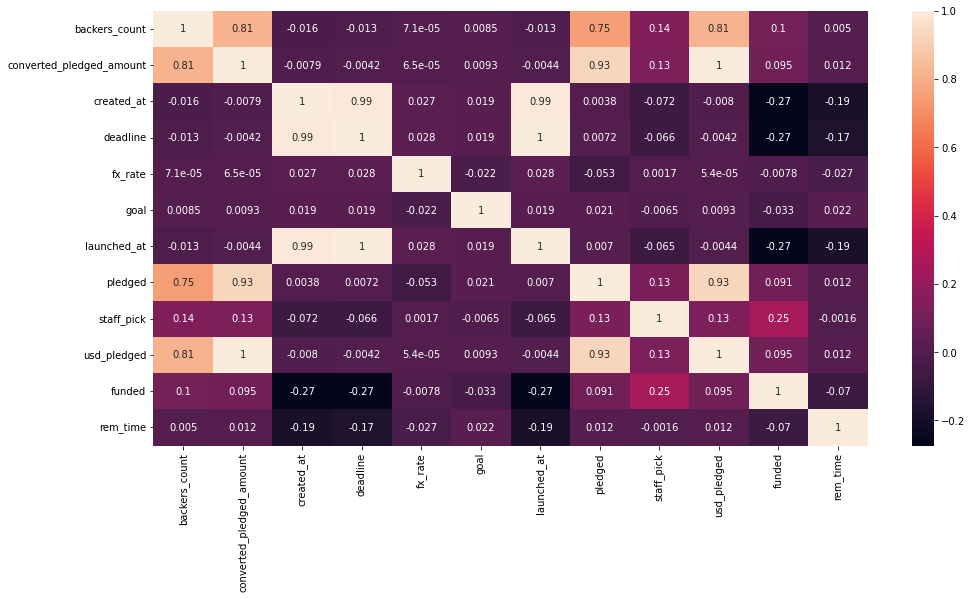

In [23]:
corrmat2 = data.corr()

sns.heatmap(corrmat2, annot=True)

In [24]:
print("t werkt")

t werkt
